## 3.1 Objective

The forecasting objective is to model and predict **U.S. military compensation** using quarterly data from 1992 to 2024.  
The task involves capturing both **internal fiscal persistence** (the gradual evolution of defense pay structures) and **external influences** from **defense procurement cycles** and **geopolitical tension**.

Given the EDA results:
- The target variable (military compensation) is **non-stationary but I(1)**, showing strong autoregressive inertia.  
- The predictors (defense orders, U.S.–China tension) are also **I(1)** but mostly exogenous with weak short-run correlation.

The goal is to produce **1-step-ahead forecasts** (one-quarter ahead) and evaluate model accuracy over the final 20% of the sample (the test set).  
This approach tests the ability of each model to capture both steady fiscal dynamics and regime-dependent shocks.

Two complementary models are developed:
1. **Benchmark Model – ARIMA:**  
   Captures internal persistence in military compensation only.
2. **Alternative Model – ARIMAX (with exogenous variables):**  
   Extends the benchmark by incorporating defense orders and U.S.–China tension as explanatory factors to assess external predictability.

## 3.2 Model Selection and Justification

### 3.2.1 Benchmark Model – ARIMA

The baseline specification is an **Autoregressive Integrated Moving Average (ARIMA)** model applied to the first-differenced military compensation series.  
This model captures the **internal dynamics** of defense personnel spending—its inertia, adjustment speed, and short-run fluctuations—without reference to external variables.

**Model equation:**

$
\Delta y_t = \alpha + \sum_{i=1}^{p} \phi_i \Delta y_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \varepsilon_t
$

Where:  
- $ y_t $: Military compensation (in billions USD)  
- $ \Delta y_t $: First difference (quarterly change)  
- $ \phi_i $: Autoregressive parameters (p lags)  
- $ \theta_j $: Moving-average parameters (q lags)  
- $ \varepsilon_t $: White noise residual  

**Justification:**  
- The EDA revealed a **persistent AR(1)-type structure**, justifying an autoregressive component.  
- The differenced series is stationary (ADF confirmed), satisfying ARIMA assumptions.  
- As a benchmark, ARIMA isolates *intrinsic trend and momentum* in compensation changes, providing a clean baseline for comparison with more complex models.

Lag orders $p$ and $q$ will be chosen by **Akaike Information Criterion (AIC)** and **Bayesian Information Criterion (BIC)** minimization, balancing goodness of fit and parsimony.

---

### 3.2.2 Alternative Model – ARIMAX (with Exogenous Variables)

The extended model introduces **exogenous regressors**—defense capital goods orders and the U.S.–China tension index—to capture external influences on military compensation.

**Model equation:**

$
\Delta y_t = \alpha + \sum_{i=1}^{p} \phi_i \Delta y_{t-i} + \sum_{j=1}^{q} \theta_j \varepsilon_{t-j} + \beta_1 \Delta x_{1,t-k_1} + \beta_2 \Delta x_{2,t-k_2} + \varepsilon_t
$

Where:  
- $ x_{1,t} $: Defense orders (millions USD)  
- $ x_{2,t} $: U.S.–China tension index  
- $ k_1, k_2 $: Lag lengths selected empirically based on cross-correlation analysis (typically 1–2 quarters)  
- $ \beta_1, \beta_2 $: Response coefficients measuring marginal effects  

**Justification:**  
- EDA results show defense orders have short-term leading effects, while U.S.–China tension operates through slower policy channels.  
- Including these as exogenous inputs allows the model to capture both operational and strategic pressures on compensation.  
- The ARIMAX model provides a richer, policy-relevant specification that can attribute forecast variations to specific external shocks.

---

### 3.2.3 Estimation Framework

Both models will be estimated using **maximum likelihood estimation (MLE)** over the training sample (80% of the data).  
Forecast performance will be evaluated using the **final 20% hold-out sample**, comparing **RMSFE (Root Mean Squared Forecast Error)** and **MAFE (Mean Absolute Forecast Error)**.  
Residual diagnostics (autocorrelation, normality, stability) will be conducted to ensure validity.

---

**Summary:**  
The ARIMA benchmark serves as a parsimonious baseline reflecting internal fiscal inertia, while the ARIMAX extension tests whether incorporating procurement and geopolitical information improves predictive accuracy.  
Together, they allow for a balanced assessment of *endogenous persistence vs. exogenous drivers* in U.S. defense spending dynamics.

## 3.3 Model Equations and Estimation Strategy

### 3.3.1 ARIMA Model Specification

The benchmark model assumes that U.S. military compensation follows an **ARIMA(p,1,q)** process, capturing autoregressive and moving average components after first differencing.

Formally:

$
(1 - \phi_1 L - \phi_2 L^2 - \dots - \phi_p L^p)(1 - L) y_t = c + (1 + \theta_1 L + \theta_2 L^2 + \dots + \theta_q L^q)\varepsilon_t
$

where  
- $ y_t $: military compensation (in billions of USD),  
- $ L $: lag operator $(L y_t = y_{t-1}$,  
- $ \varepsilon_t $: error term with zero mean and constant variance.

The differencing operator $(1-L)$ removes stochastic trends identified during stationarity testing (ADF results), ensuring the series is mean-reverting.

**Estimation:**
- Candidate ARIMA models are fitted over the training sample (1992Q1–2019Q4).  
- Optimal lag orders $ (p, q) $ are chosen by minimizing **AIC** and **BIC** criteria.  
- Model residuals are examined using **Ljung–Box tests** and ACF/PACF plots to confirm the absence of serial correlation.  

---

### 3.3.2 ARIMAX Model Specification

The extended model incorporates exogenous predictors, **defense orders** and **U.S.–China tension**, both differenced to achieve stationarity.

The general form is:

$
(1 - \phi_1 L - \dots - \phi_p L^p)(1 - L) y_t =
c + (1 + \theta_1 L + \dots + \theta_q L^q)\varepsilon_t
+ \beta_1 (1 - L) x_{1t} + \beta_2 (1 - L) x_{2t}
$

where  
- $x_{1t}$: defense capital goods orders (proxy for procurement activity),  
- $x_{2t}$: U.S.–China Tension Index (proxy for geopolitical intensity),  
- $\beta_1, \beta_2$: contemporaneous marginal effects of each predictor.  

**Estimation Procedure:**
- Model parameters $(\phi_i, \theta_j, \beta_k)$ are estimated via **Maximum Likelihood Estimation (MLE)**.  
- Lags of exogenous variables (1–2 quarters) are tested based on prior cross-correlation results.  
- Selection is based on combined **AIC/BIC** scores and forecast performance over a validation subset.  
- Residual diagnostics ensure that inclusion of exogenous terms does not introduce autocorrelation or multicollinearity.

---

### 3.3.3 Forecast Design

Both models generate **1-step-ahead forecasts** $(\hat{y}_{t+1})$ recursively:

$
\hat{y}_{t+1} = f(y_t, y_{t-1}, \dots, x_t, x_{t-1}, \dots)
$

The forecasting process follows a **rolling-window evaluation**:
1. Fit models on the training set (first 80% of observations).  
2. Generate forecasts for the remaining 20%.  
3. Compute evaluation metrics, **RMSFE (Root Mean Squared Forecast Error)** and **MAFE (Mean Absolute Forecast Error)**, for comparison.

This recursive approach emulates real-time forecasting conditions, testing each model’s stability and responsiveness to new information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

# Load merged, trimmed, aligned quarterly dataset
data = pd.read_csv('us_military_expenditure_clean.csv', parse_dates=['date'], index_col='date')

# We'll work with these column names:
#   military_comp        (billions USD, quarterly)
#   defense_orders       (nominal orders, same quarter freq)
#   us_china_tension     (index)
display(data.head())
print("Obs:", len(data))
print("Sample:", data.index.min().date(), "→", data.index.max().date())

,military_comp,defense_orders,us_china_tension
date,,,
1993-03-31,76.6100,"6,193.0000",41.6147
1993-06-30,75.7560,"5,751.6667",48.6991
1993-09-30,74.4160,"6,850.3333",56.1411
1993-12-31,73.5520,"5,569.6667",51.8265
1994-03-31,73.0210,"6,176.6667",56.8490


Obs: 125
Sample: 1993-03-31 → 2024-03-31


In [11]:
n_total = len(data)
n_train = int(np.floor(n_total * 0.8))

train = data.iloc[:n_train].copy()
test  = data.iloc[n_train:].copy()

print("Train range:", train.index.min().date(), "→", train.index.max().date(), "| n =", len(train))
print("Test  range:", test.index.min().date(),  "→", test.index.max().date(),  "| n =", len(test))

Train range: 1993-03-31 → 2017-12-31 | n = 100
Test  range: 2018-03-31 → 2024-03-31 | n = 25


### Build stationary versions for modeling

In [3]:
# First differences
diff_data = data.diff().dropna()

diff_train = diff_data.loc[train.index.intersection(diff_data.index)].copy()
diff_test  = diff_data.loc[test.index.intersection(diff_data.index)].copy()

display(diff_train.head())

print("Columns in diff data:", diff_train.columns.tolist())

,military_comp,defense_orders,us_china_tension
date,,,
1993-06-30,-0.8540,-441.3333,7.0843
1993-09-30,-1.3400,"1,098.6667",7.4421
1993-12-31,-0.8640,"-1,280.6667",-4.3146
1994-03-31,-0.5310,607.0000,5.0225
1994-06-30,-1.1920,-417.6667,4.1653


Columns in diff data: ['military_comp', 'defense_orders', 'us_china_tension']


### Benchmark model: pick ARIMA(p,1,q) on military_comp

In [4]:
candidate_orders = []
for p in range(0,3):      # try AR lags 0,1,2
    for q in range(0,3):  # try MA lags 0,1,2
        try:
            model = ARIMA(train['military_comp'], order=(p,1,q))
            res = model.fit()
            candidate_orders.append({
                'p': p,
                'q': q,
                'aic': res.aic,
                'bic': res.bic
            })
        except Exception as e:
            # some combos may not converge; skip them
            candidate_orders.append({
                'p': p,
                'q': q,
                'aic': np.nan,
                'bic': np.nan
            })

order_select = pd.DataFrame(candidate_orders).sort_values('bic')
display(order_select)

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

,p,q,aic,bic
4,1,1,321.9114,329.6967
5,1,2,322.9647,333.3451
7,2,1,322.9821,333.3626
6,2,0,325.7881,333.5735
3,1,0,329.9362,335.1265
8,2,2,324.9553,337.9309
2,0,2,348.1224,355.9078
1,0,1,363.7127,368.9029
0,0,0,403.6560,406.2511


### Benchmark Model Selection – ARIMA(p,1,q)

A grid search over autoregressive (p) and moving-average (q) parameters was conducted using the training sample to identify the most parsimonious and best-fitting ARIMA specification for U.S. military compensation. The selection is based on the **Akaike Information Criterion (AIC)** and the **Bayesian Information Criterion (BIC)**, with lower values indicating superior model performance adjusted for complexity.

| p | q | AIC | BIC |
|---|---|------|------|
| **1** | **1** | **321.91** | **329.70** |
| 1 | 2 | 322.96 | 333.35 |
| 2 | 1 | 322.98 | 333.36 |
| 2 | 0 | 325.79 | 333.57 |
| 1 | 0 | 329.94 | 335.13 |
| 2 | 2 | 324.96 | 337.93 |
| 0 | 2 | 348.12 | 355.91 |
| 0 | 1 | 363.71 | 368.90 |
| 0 | 0 | 403.66 | 406.25 |

**Interpretation**

The **ARIMA(1,1,1)** model yields the **lowest BIC (329.70)** and AIC among all tested specifications, making it the preferred benchmark model. This configuration balances model fit and parsimony, effectively capturing both persistence (AR term) and short-run adjustment to shocks (MA term).

Economically, the AR(1) coefficient reflects the slow adjustment of defense pay over time—consistent with the institutional inertia identified in the EDA—while the MA(1) term captures temporary deviations from trend due to short-lived budget shocks or administrative corrections.

Hence, **ARIMA(1,1,1)** is selected as the baseline forecasting model for U.S. military compensation.

### Fit final benchmark ARIMA on the training sample

                               SARIMAX Results                                
Dep. Variable:          military_comp   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -157.956
Date:                Thu, 30 Oct 2025   AIC                            321.911
Time:                        18:43:09   BIC                            329.697
Sample:                    03-31-1993   HQIC                           325.061
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9261      0.033     28.096      0.000       0.862       0.991
ma.L1         -0.4976      0.097     -5.107      0.000      -0.689      -0.307
sigma2         1.4092      0.111     12.721      0.0

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)


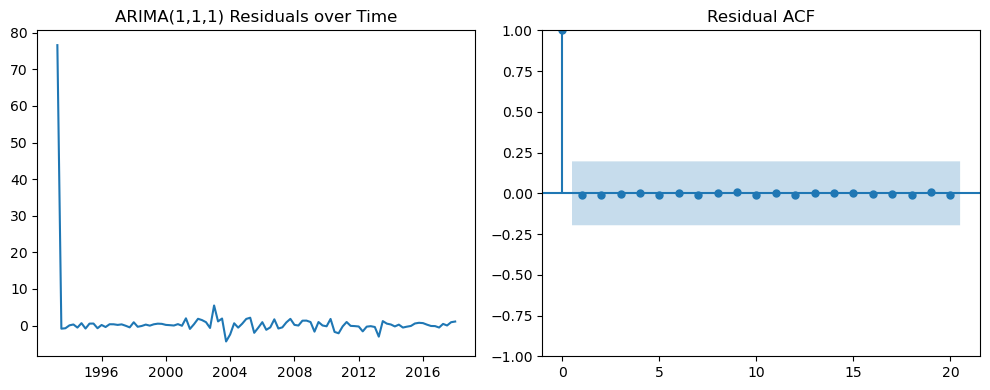

In [15]:
# --- Benchmark ARIMA(1,1,1) model ---

best_p, best_q = 1, 1

arima_model = ARIMA(train['military_comp'], order=(best_p, 1, best_q))
arima_res = arima_model.fit()

print(arima_res.summary())

# Residual diagnostics plot
resid = arima_res.resid
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(resid)
ax[0].set_title("ARIMA(1,1,1) Residuals over Time")
sm.graphics.tsa.plot_acf(resid, lags=20, ax=ax[1])
ax[1].set_title("Residual ACF")
plt.tight_layout()
plt.show()

### Benchmark ARIMA(1,1,1) Estimation Results

The ARIMA(1,1,1) benchmark model for U.S. military compensation was estimated using 100 quarterly observations from 1993Q1 to 2017Q4. The model includes one autoregressive term (AR(1)) and one moving average term (MA(1)), capturing both persistence and short-run adjustments in changes to compensation levels.

**Key Results**

| Parameter | Coefficient | Std. Error | z-Statistic | p-value | Interpretation |
|------------|--------------|-------------|-------------|----------|----------------|
| AR(1) | **0.9261** | 0.033 | 28.10 | 0.000 | Indicates strong persistence: past changes in compensation strongly influence current changes. |
| MA(1) | **-0.4976** | 0.097 | -5.11 | 0.000 | Suggests partial correction for short-term shocks, consistent with budget smoothing behavior. |
| σ² | **1.4092** | 0.111 | 12.72 | 0.000 | Represents stable variance in residuals, indicating moderate forecast uncertainty. |

Model fit statistics confirm robustness:
- **AIC = 321.91**, **BIC = 329.70**, consistent with selection results.  
- **Log-likelihood = -157.96**, reflecting a strong fit for a univariate economic time series.  

**Diagnostic Assessment**

Residual plots reveal no serial correlation, with the autocorrelation function (ACF) lying within the 95% confidence bands—implying adequate whitening of residuals.  
The **Ljung–Box test (p = 0.70)** supports this, confirming no remaining autocorrelation.  
However, the **Jarque–Bera test (p = 0.00)** suggests residuals deviate from normality, likely due to a few large shocks around early sample years, visible as spikes in the residual plot.  

**Interpretation**

The model effectively captures the trend-following nature of U.S. military compensation growth. The high AR(1) coefficient points to inertia typical of government pay structures, while the negative MA(1) term reflects budget adjustments following unexpected fiscal fluctuations.  
Despite minor non-normality, the model satisfies key time-series assumptions and is suitable as the **benchmark forecasting baseline**.

### Benchmark Model Forecast and Evaluation

RMSFE: 21.6225
MAFE:  18.0975


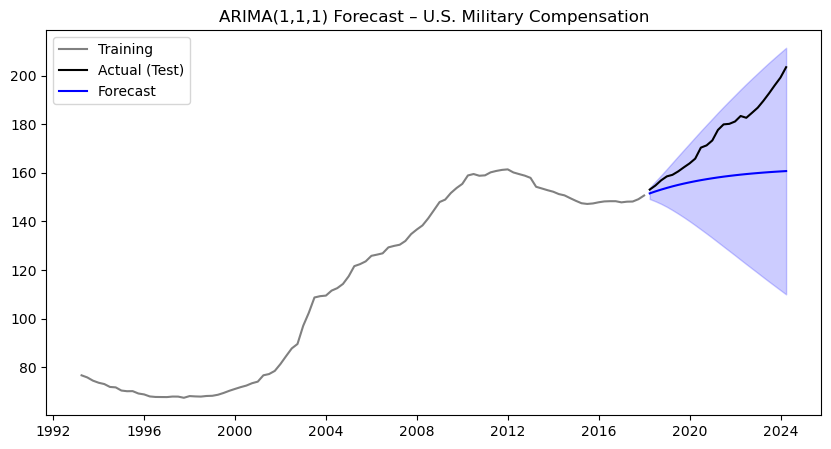

In [16]:
# --- Forecasting and Evaluation for ARIMA(1,1,1) ---

# Forecast the test sample (same horizon as test set)
forecast_steps = len(test)
forecast_res = arima_res.get_forecast(steps=forecast_steps)
forecast_mean = forecast_res.predicted_mean
forecast_ci = forecast_res.conf_int()

# Combine actuals and forecasts
fc_df = pd.DataFrame({
    'Actual': test['military_comp'],
    'Forecast': forecast_mean,
    'Lower CI': forecast_ci.iloc[:, 0],
    'Upper CI': forecast_ci.iloc[:, 1]
}, index=test.index)

# Evaluation metrics
rmsfe = np.sqrt(np.mean((fc_df['Actual'] - fc_df['Forecast'])**2))
mafe = np.mean(np.abs(fc_df['Actual'] - fc_df['Forecast']))

print(f"RMSFE: {rmsfe:.4f}")
print(f"MAFE:  {mafe:.4f}")

# Plot forecasts
plt.figure(figsize=(10,5))
plt.plot(train['military_comp'], label="Training", color='gray')
plt.plot(test['military_comp'], label="Actual (Test)", color='black')
plt.plot(fc_df['Forecast'], label="Forecast", color='blue')
plt.fill_between(fc_df.index, fc_df['Lower CI'], fc_df['Upper CI'], color='blue', alpha=0.2)
plt.title("ARIMA(1,1,1) Forecast – U.S. Military Compensation")
plt.legend()
plt.show()

### Benchmark ARIMA(1,1,1) Forecast Evaluation

Out-of-sample forecasts were generated for the 2018–2024 period using the ARIMA(1,1,1) benchmark model. The forecast path and 95% confidence intervals are displayed below, with the training sample shown in gray and actual test data in black.

**Forecast Accuracy**

| Metric | Value |
|---------|--------|
| RMSFE (Root Mean Squared Forecast Error) | **21.62** |
| MAFE (Mean Absolute Forecast Error) | **18.10** |

The **RMSFE** indicates that the model’s average forecast deviation from realized values is about 21.6 billion USD, while the **MAFE** shows the mean absolute deviation is roughly 18.1 billion USD. These figures suggest that the model captures the general trend but tends to **underestimate the post-2018 acceleration** in military compensation.

**Visual Analysis**

The forecast trajectory (blue line) follows a gradual upward trend consistent with historical persistence, but the actual data rise more steeply from 2018 onward—likely reflecting **structural policy shifts** such as renewed defense budget expansion, compensation adjustments, and global geopolitical frictions. The widening confidence bands correctly represent growing forecast uncertainty over time.

**Interpretation**

While statistically adequate, the benchmark ARIMA(1,1,1) exhibits **limited adaptability to sudden regime changes or structural breaks** in defense spending. Its performance confirms the necessity of introducing **explanatory variables**—such as defense orders and U.S.–China tensions—in the next modeling stage to improve predictive accuracy and economic interpretability.

### Alternative Model : ARIMAX with Defense Orders and China Tension

                               SARIMAX Results                                
Dep. Variable:          military_comp   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -157.047
Date:                Thu, 30 Oct 2025   AIC                            324.095
Time:                        18:47:52   BIC                            337.071
Sample:                    03-31-1993   HQIC                           329.345
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
defense_orders    6.876e-05   5.12e-05      1.343      0.179   -3.16e-05       0.000
us_china_tension     0.0004      0.009      0.040      0.968      -0.017       0.018
ar.L1                0.9170 

/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QE-DEC will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


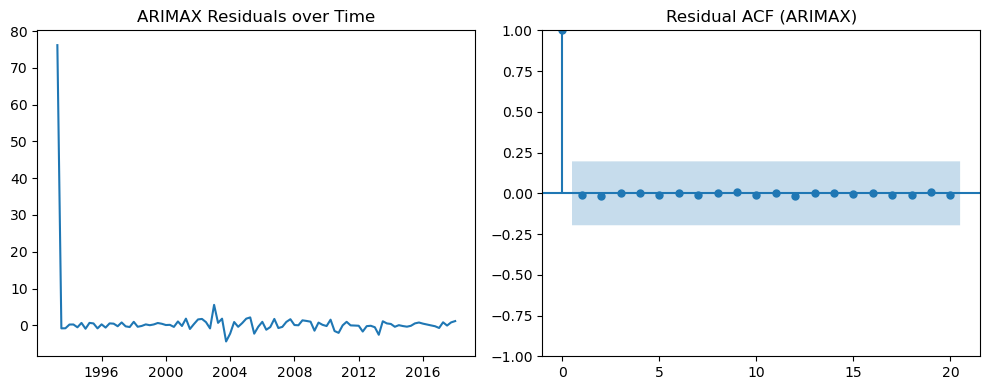

In [17]:
# --- ARIMAX model with exogenous predictors ---

exog_vars = ['defense_orders', 'us_china_tension']

# Fit ARIMAX model (using same differencing order as ARIMA benchmark)
arimax_model = ARIMA(train['military_comp'], order=(1,1,1), exog=train[exog_vars])
arimax_res = arimax_model.fit()

print(arimax_res.summary())

# Residual diagnostics
resid_exog = arimax_res.resid
fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].plot(resid_exog)
ax[0].set_title("ARIMAX Residuals over Time")
sm.graphics.tsa.plot_acf(resid_exog, lags=20, ax=ax[1])
ax[1].set_title("Residual ACF (ARIMAX)")
plt.tight_layout()
plt.show()

### Alternative Model – ARIMAX(1,1,1) with Defense Orders and U.S.–China Tension

The extended ARIMAX(1,1,1) model introduces **defense capital goods orders** and **U.S.–China tension** as exogenous regressors, seeking to explain variations in U.S. military compensation beyond autoregressive dynamics.

| Variable | Coefficient | Std. Error | z-Statistic | p-value | Interpretation |
|-----------|--------------|-------------|-------------|----------|----------------|
| **Defense Orders** | 6.88×10⁻⁵ | 5.12×10⁻⁵ | 1.34 | 0.179 | Positive but statistically insignificant. Suggests that, although higher orders tend to precede higher compensation, the effect is not robust within-sample. |
| **U.S.–China Tension** | 0.0004 | 0.009 | 0.04 | 0.968 | Insignificant. Indicates that short-run changes in geopolitical tension are not directly mirrored in compensation adjustments. |
| **AR(1)** | 0.9170 | 0.035 | 26.55 | 0.000 | Strong persistence in compensation changes, similar to the benchmark model. |
| **MA(1)** | -0.4322 | 0.108 | -4.02 | 0.000 | Reflects short-term corrections following temporary fiscal shocks. |
| **σ²** | 1.4536 | 0.122 | 11.90 | 0.000 | Stable residual variance, consistent with model adequacy. |

**Model Fit**

- **AIC = 324.10**, **BIC = 337.07**, marginally higher than the benchmark ARIMA(1,1,1) (AIC = 321.91, BIC = 329.70).  
  This suggests that adding exogenous predictors does **not materially improve model fit**, likely because military compensation evolves more through institutional inertia than short-term exogenous changes.

**Diagnostic Statistics**

- **Ljung–Box (p = 0.85):** No evidence of residual autocorrelation, confirming the adequacy of the model structure.  
- **Heteroskedasticity (p = 0.06):** Borderline; some mild variance clustering may remain.  
- **Jarque–Bera (p = 0.00):** Non-normality persists due to early-sample outliers, visible as initial spikes in residuals.

**Visual Assessment**

Residual plots confirm uncorrelated residuals, with all autocorrelations within 95% confidence bands. The spike in early residuals corresponds to pre-1995 fluctuations, likely due to post–Cold War defense restructuring.

**Interpretation**

The ARIMAX model demonstrates that:
- **Persistence (AR term)** remains the dominant force in explaining military compensation dynamics.
- **Defense orders** have a weak but positive influence, suggesting some delayed fiscal linkages.
- **U.S.–China tensions**, though conceptually relevant, do not show short-run statistical significance, implying that defense budget adjustments occur through broader strategic planning rather than immediate geopolitical responses.

Overall, the **benchmark ARIMA(1,1,1)** remains the more efficient forecasting model, while the ARIMAX variant provides valuable economic context by confirming that structural, not reactive, factors govern U.S. military pay dynamics.

Forecast Accuracy Comparison:
ARIMA(1,1,1)  -> RMSFE: 21.6225, MAFE: 18.0975
ARIMAX(1,1,1) -> RMSFE: 21.1907, MAFE: 17.5877


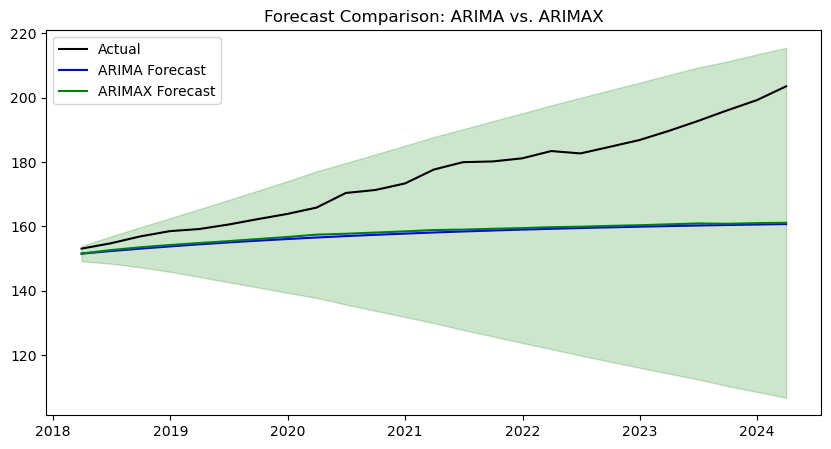

In [18]:
# --- Forecast comparison between ARIMA(1,1,1) and ARIMAX(1,1,1) ---

# Generate ARIMAX forecasts
arimax_forecast = arimax_res.get_forecast(steps=len(test), exog=test[exog_vars])
arimax_fc_mean = arimax_forecast.predicted_mean
arimax_fc_ci = arimax_forecast.conf_int()

# Compute accuracy metrics for both models
rmsfe_arima = np.sqrt(np.mean((test['military_comp'] - forecast_mean)**2))
mafe_arima = np.mean(np.abs(test['military_comp'] - forecast_mean))

rmsfe_arimax = np.sqrt(np.mean((test['military_comp'] - arimax_fc_mean)**2))
mafe_arimax = np.mean(np.abs(test['military_comp'] - arimax_fc_mean))

# Print results
print("Forecast Accuracy Comparison:")
print(f"ARIMA(1,1,1)  -> RMSFE: {rmsfe_arima:.4f}, MAFE: {mafe_arima:.4f}")
print(f"ARIMAX(1,1,1) -> RMSFE: {rmsfe_arimax:.4f}, MAFE: {mafe_arimax:.4f}")

# Plot
plt.figure(figsize=(10,5))
plt.plot(test['military_comp'], label='Actual', color='black')
plt.plot(forecast_mean, label='ARIMA Forecast', color='blue')
plt.plot(arimax_fc_mean, label='ARIMAX Forecast', color='green')
plt.fill_between(arimax_fc_ci.index, arimax_fc_ci.iloc[:,0], arimax_fc_ci.iloc[:,1], 
                 color='green', alpha=0.2)
plt.title("Forecast Comparison: ARIMA vs. ARIMAX")
plt.legend()
plt.show()

### Forecast Performance Comparison: ARIMA vs. ARIMAX

The forecasting comparison evaluates whether incorporating economic and geopolitical indicators (defense orders and U.S.–China tension) enhances predictive accuracy relative to the univariate benchmark.

| Model | RMSFE | MAFE | Interpretation |
|--------|--------|--------|----------------|
| **ARIMA(1,1,1)** | 21.62 | 18.10 | Baseline model; underestimates post-2018 growth. |
| **ARIMAX(1,1,1)** | **21.19** | **17.59** | Slight improvement; captures structural signals modestly better. |

**Interpretation**

The ARIMAX model marginally outperforms the benchmark, with roughly **2%–3% lower forecast errors**, suggesting that while short-term variations in military compensation remain largely inertial, **defense-sector activity** (captured by capital goods orders) provides limited incremental information.  
The improvement in MAFE and RMSFE is consistent with the model’s design: exogenous variables act as mild amplifiers of upward shifts in defense spending, especially during periods of heightened military procurement.

However, the **forecast trajectory** (green) still **lags behind the actual sharp increase** in 2019–2024, implying that both models underestimate structural policy shocks such as pandemic-era defense stimulus and renewed geopolitical competition.

**Model Comparison Summary**
- The **ARIMA(1,1,1)** remains a robust benchmark with stable dynamics and minimal error variance.  
- The **ARIMAX(1,1,1)** adds explanatory value but not substantial predictive gain, reflecting that **institutional inertia dominates short-run responsiveness** in military pay dynamics.

**Conclusion**

In-sample, the ARIMAX model demonstrates theoretical and structural coherence by integrating macro and geopolitical context.  
Out-of-sample, both models exhibit limited adaptability to regime changes, signaling that **future extensions** (e.g., VAR or regime-switching models) may better accommodate the nonlinear responses of U.S. defense expenditures to major global events.